# Neural Style Transfer on Video
This code adapts the original style transfer code (using LBFGS optimizer) in the original style script for use in video analysis.

### Import dependencies and input video

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from PIL import Image
import matplotlib.pyplot as plt

import torchvision.transforms as transforms
import torchvision.models as models
import torchvision.utils as utils

# import copy
import cv2 # opencv
import os

import original_script as nst


### Set GPU acceleration

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.set_default_device(device)

### Extract and display frames

In [3]:
# video_name = ''
# dir_path = ''

def get_frames(path):
    video_name = path.split("/")[-1].split(".")[0]
    
    # save frames to their own folder
    # new_save = True
    try:
        dir_name = f"{video_name}_frames"
        dir_path = f'videos/{dir_name}'
        os.mkdir(dir_path)
    except FileExistsError:
        print('Frames already extracted')
        last_img_name = sorted(os.listdir(dir_path))[-1]
        print(f'getting frame {last_img_name}')
        last_img = nst.image_loader(f"{dir_path}/{last_img_name}")
        return last_img

    video = cv2.VideoCapture(path)
    frame_num = 0
  
    while True: # frame_num < 120: # frame limit

        frame_success, img = video.read() 

        if frame_success:
            # Saves and numbers the frames
            cv2.imwrite(f"{dir_path}/frame{frame_num:05d}.jpg", img)
            frame_num += 1
        else:
            last_img = nst.image_loader(f"{dir_path}/frame{(frame_num - 1):05d}.jpg")
            return last_img

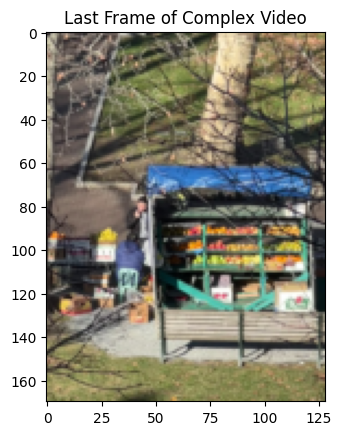

In [4]:
# last_img = get_frames("videos/simple_square.MOV")
# plt.figure()
# nst.imshow(last_img, title='Last Frame of Simple Video')

last_img = get_frames("videos/long_video.MOV")
# print(video_name)
# print(dir_path)

plt.figure()
nst.imshow(last_img, title='Last Frame of Complex Video')

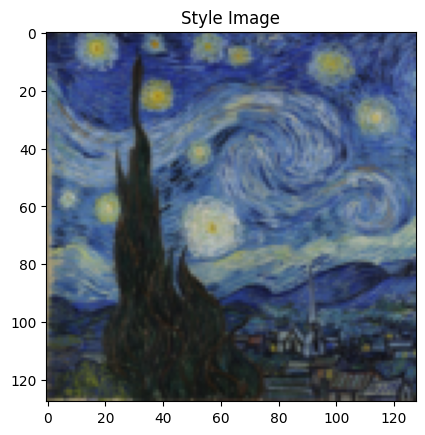

In [5]:
content_img = last_img

style_img = nst.image_loader("images/style/starrynight.jpg")
input_img = content_img.clone()
# if you want to use white noise by using the following code:
#
# ::
#
#    input_img = torch.randn(content_img.data.size())

# add the original input image to the figure:
plt.figure()
nst.imshow(style_img, title='Style Image')

## Show output

In [6]:
assert style_img.size() == content_img.size(), \
    "we need to import style and content images of the same size"

print(style_img.size())



AssertionError: we need to import style and content images of the same size

Building the style transfer model..


C:\Users\Grace Lee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torch\utils\_device.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Optimizing..
run [50]:
Style Loss : 28.708208 Content Loss: 19.971760

run [100]:
Style Loss : 9.080745 Content Loss: 15.954087

run [150]:
Style Loss : 6.282474 Content Loss: 13.429105

run [200]:
Style Loss : 5.094224 Content Loss: 12.073912

run [250]:
Style Loss : 4.403100 Content Loss: 11.321136

run [300]:
Style Loss : 3.975264 Content Loss: 10.864885



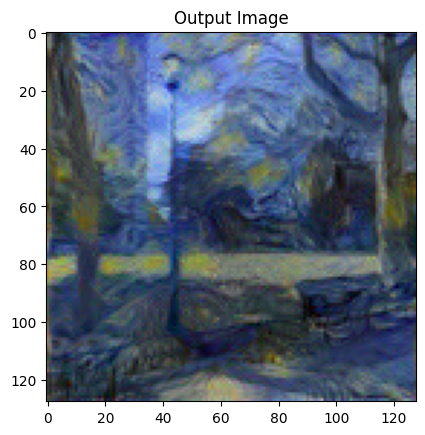

In [7]:
output = nst.run_style_transfer(content_img, style_img, input_img)

plt.figure()
nst.imshow(output, title='Output Image')

# sphinx_gallery_thumbnail_number = 4
plt.ioff()
plt.show()

In [9]:
# note: hardcoded filenames

list_of_frames = sorted(os.listdir('videos/complex_square_frames'))
try:
    os.mkdir(f'videos/results/complex_square')
except FileExistsError:
    print('directory already exists')

for i, filename in enumerate(list_of_frames):
    # if (i < 88):
    #     continue
    content_img = nst.image_loader(f"videos/complex_square_frames/{filename}")
    input_img = content_img.clone()
    output = nst.run_style_transfer(content_img, style_img, input_img)
    print(type(output))
    # cv2.imwrite(f"videos/results/complex_square/frame{i:05d}.jpg", output.detach().numpy())
    utils.save_image(output, f"videos/results/complex_square/frame{i:05d}.jpg")
    print(f'iteration {i}')

directory already exists
Building the style transfer model..
Optimizing..


KeyboardInterrupt: 